# Visualizing the data for HR analytics

In [1]:
# Import data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("HR-Employee-Attrition.csv")

In [2]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Inferences from Above data
1. Attrition is in "yes" or 'No" this will be our predictor parameter
2. All ages are more than 18 so we can discard the above 18 feature as it wont contribute to the model
3. EmployeeNumber is just a unique identifier
4. EmployeeCount also doesn't change and can be ignored from data
5. Standard hours is same for all employees so can be removed
6. Performance Rating has only two values 3 and 4

### % Attrition

In [47]:
percentage = df["Attrition"].value_counts()
retention = percentage[1]*100/(percentage[1]+percentage[0])

In [49]:
print("The percentage of people leaving organization as per dataset :",round(retention,2),"%")

The percentage of people leaving organization as per dataset : 16.12 %


#### Since we have more sample of people staying with the company  our model will be better in predcting the Non Separating Employees

In [3]:
# Separating the continous and categorical data
con = []
cat = []
for i in df.columns:
    if df[i].dtypes == 'int64':
        con.append(i) 
    elif df[i].dtypes == 'object':
        cat.append(i)

### Dividing features into categorical and continous 

In [4]:
cat = []
con = []
for i in df.columns:
    if df[i].dtypes == 'object':
        cat.append(i)
    elif df[i].dtypes == 'int64':
        con.append(i)

## Univariate Analysis

C:\Users\vksg8\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


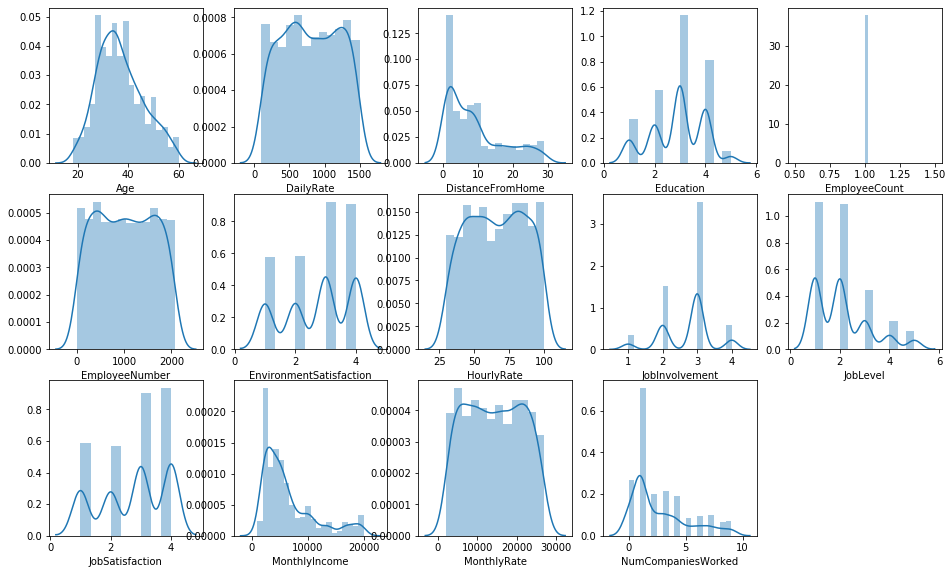

In [5]:
# Checking the distribution of Values in continous features
plt.figure(figsize = (16,20))
for i in range(0,14):
    plt.subplot(6,5,i+1)
    sns.distplot(df[con[i]])

C:\Users\vksg8\Anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


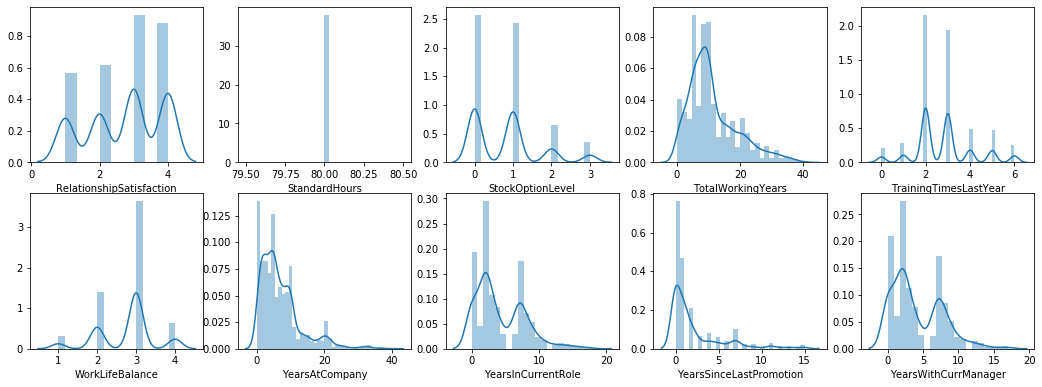

In [6]:
plt.figure(figsize = (18,20))
for i in range(16,26):
    plt.subplot(6,5,i+1-16)
    sns.distplot(df[con[i]])

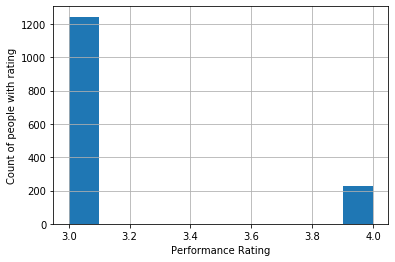

In [7]:
plt.xlabel("Performance Rating")
plt.ylabel("Count of people with rating")
df[con[15]].hist()

## Bivariate Analysis

### 1. Continous vs Attrition

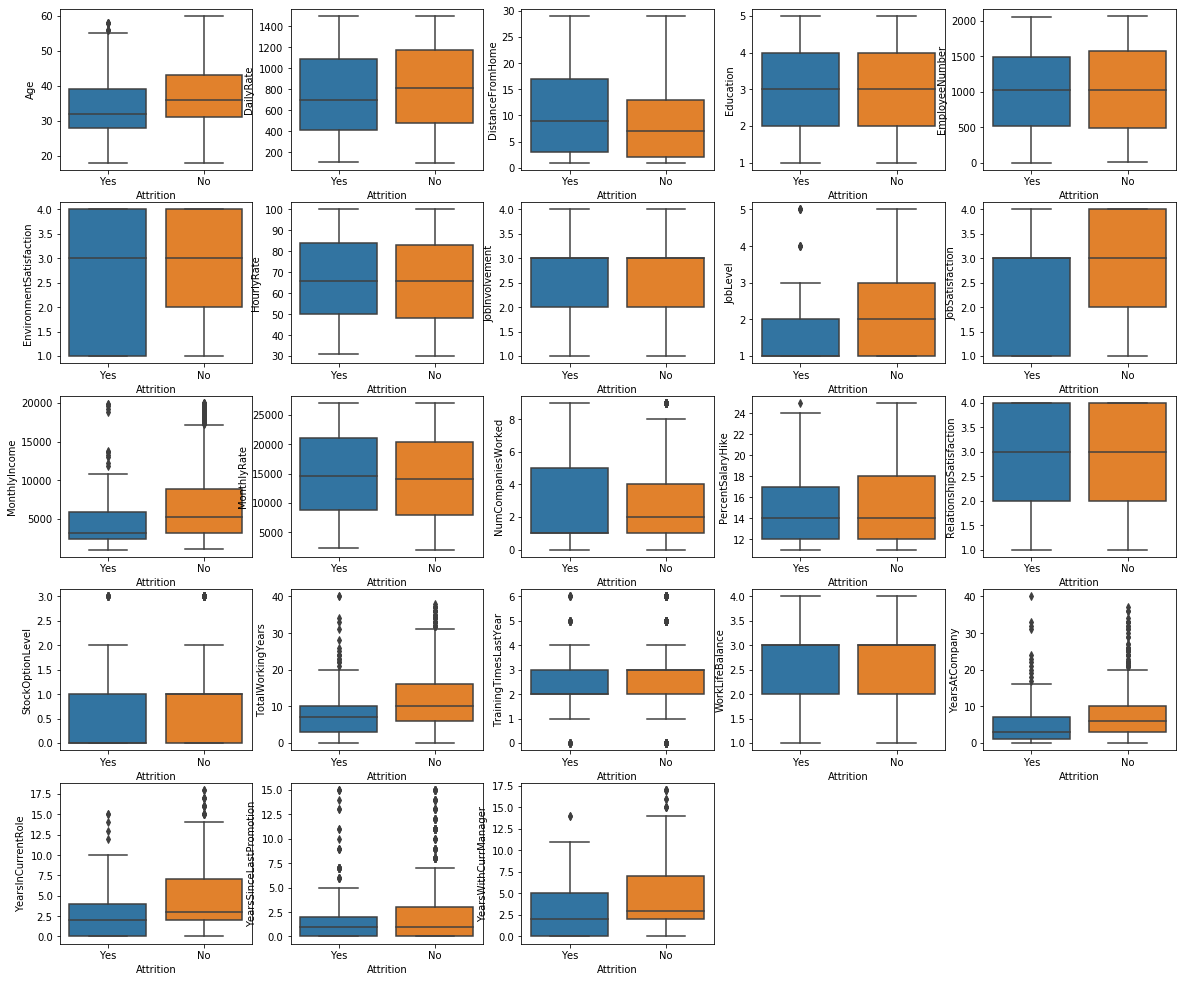

In [20]:
plt.figure(figsize = (20,35))
for i in range(0,len(con)):
    plt.subplot(10,5,i+1)
    sns.boxplot(data = df, x = 'Attrition', y = df[con[i]])

## Inference from above plot
The features that are related to attrition are:
1. Age
2. DailyRate
3. DistanceFromHome
4. EnvironmentSatisfaction
5. HourlyRate
6. JobLevel
7. JobSatisfaction
8. MonthlyIncome
9. MonthlyRate
10. NumCompaniesWorked
11. PercentSalaryHike
12. TotalWorkingYears
13. YearsAtCompany
14. YearsInCurrentRole
15. YearsSinceLastPromotion
16. YearsWithCurrManager

#### Note: To analyze these features we will create scatterplots later

## Delete the non related features
1. Remove EmployeeCount
2. Remove PerformanceRating
3. Remove StandardHours

In [9]:
con.remove('EmployeeCount')
con.remove('PerformanceRating')
con.remove('StandardHours')